<a href="https://colab.research.google.com/github/RecSys-lab/MoViFex/blob/main/extract_visual_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MoViFex Framework - Movie Feature Extractor Pipeline**

🚀 Framework: [link](https://github.com/RecSys-lab/MoViFex)

📚 MoViFex Dataset: [web-page](https://recsys-lab.github.io/movifex_dataset/), [download link](https://huggingface.co/datasets/alitourani/MoViFex_Dataset/tree/main)

🎬 Short Videos Website: [link](https://pixabay.com/videos/)


# I. **Load the Framework**

Clone the framework into your `GDrive` and prepare it for experiments.

In [1]:
# Clone the repo
!git clone https://github.com/RecSys-lab/MoViFex.git

# Install the required library
%cd MoViFex
!pip install -e .

# Add the repository to the Python path
import sys
sys.path.append('/content/MoViFex')

# Go to the root
%cd ..

Cloning into 'MoViFex'...
remote: Enumerating objects: 758, done.
remote: Counting objects: 100% (334/334), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 758 (delta 172), reused 248 (delta 101), pack-reused 424 (from 1)
Receiving objects: 100% (758/758), 249.51 KiB | 1.71 MiB/s, done.
Resolving deltas: 100% (389/389), done.
/content/MoViFex
Obtaining file:///content/MoViFex
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 23.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Running setup.py develop for MoViFex
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the s

# **II. Use the Framework** 🚀

Import the framework and define some variables to work with it.

In [13]:
import os
import json
import movifex
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Similar to the `config.yml` file in the framework - section `pipelines/movie_frames`
configFrameExtractor = {
    "name": "Frame-extractor",
    "movies_path": "Videos",
    "frames_path": "Frames",
    "video_formats": ["mp4", "avi", "mkv"],
    "frequency": 1,
    "output_format": "jpg",
    "model_input_size": 420
}

# Variables
sampleVideoFileName = "sample.mp4"
sampleVideoDownloadPath = configFrameExtractor['movies_path']
videoUrl = 'https://cdn.pixabay.com/video/2024/02/28/202368-918049003_large.mp4'

In [5]:
# Create some folders to save the outputs
%mkdir Videos         # Stores the downloaded video file
%mkdir Frames         # Stores the extracted frames
%mkdir Embeddings     # Stores the extracted visual embeddings

**Step I. Downloading a Sample Video File**

The video is downloaded from the given path (`videoUrl`) and saves into the given directory (`sampleVideoDownloadPath`). The name of the downloaded video file is `sampleVideoFileName`.

- ⚙️ Function: `videoFileDownloader`

In [10]:
from movifex.pipelines.downloaders.utils import videoFileDownloader

print(f"- Downloading a sample video file for test ...")
videoFileDownloader(videoUrl, sampleVideoDownloadPath, sampleVideoFileName)

- Downloading a sample video file for test ...
- Downloading the video file from 'https://cdn.pixabay.com/video/2024/02/28/202368-918049003_large.mp4' ...
- Video file downloaded successfully to 'Videos/sample.mp4'!


**Step II. Pre-Checking the Video Files to be Processed**

Here, we check if the video directory contains the downloaded video file.

- ⚙️ Function: `initMovieVideos`

In [11]:
from movifex.pipelines.frames.utils import initMovieVideos

# Pre-check the input directory
fetchedMoviesPaths = initMovieVideos(configFrameExtractor)
if not fetchedMoviesPaths:
  print('- Invalid video files feed!')

print(f"- Videos to be processed: {fetchedMoviesPaths}")

Movie videos will be processed from 'Videos' ...
Processing the input movies directory. Supported video formats are ['mp4', 'avi', 'mkv'] ...
Found 1 videos to process! (e.g., Videos/sample.mp4)

- Videos to be processed: ['Videos/sample.mp4']


**Step III. Extracting Frames from the Video File**

Now, the video file(s) inside the given directory (`sampleVideoDownloadPath`) is being processed to obtain a set of frames. The configurations, such as the frame-rate to extract frames (`frequency`), the output format (`output_format`), the dimensions of the saved frames (`model_input_size`) are modifiable from `configFrameExtractor`.

The output will be a folder with the same name as the video, and a set of extracted frames in the `Frames` folder.

- ⚙️ Function: `extractMovieFrames`

In [12]:
from movifex.pipelines.frames.frameExtractor import extractMovieFrames

# Extracts all movie frames from the given folder and extracts its
extractMovieFrames(configFrameExtractor, fetchedMoviesPaths)

Extracting frames from the given set of movie videos ...
- Extracting frames of Sample with the frequency of 1 fps ...
--- Frame rate: 24 fps, Frequency: 1 fps, Frame picking rate: 24
- Extraction finished for Sample (took 4.19 seconds to extract 11 frames, saved in Frames/Sample)!



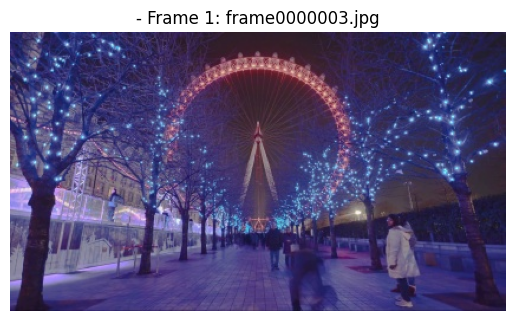

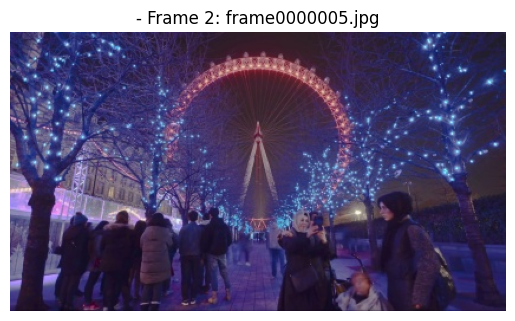

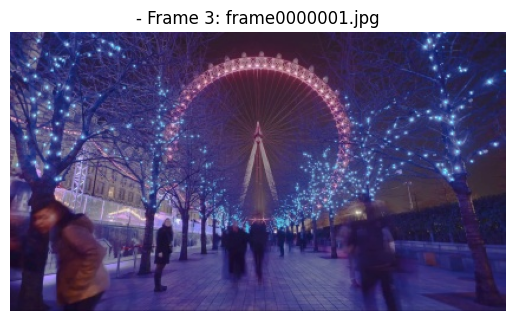

In [15]:
# A simple check to see the extracted frames
framesDir = 'Frames/Sample'
numImagesToShow = 3

# Get a list of all image files in the directory
imageFiles = [f for f in os.listdir(framesDir) if os.path.isfile(os.path.join(framesDir, f))]

for i in range(numImagesToShow):
    imagePath = os.path.join(framesDir, imageFiles[i])
    try:
        img = mpimg.imread(imagePath)
        plt.figure()
        plt.imshow(img)
        plt.title(f"- Frame {i+1}: {imageFiles[i]}")
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"- Error displaying image {imageFiles[i]}: {e}")

**Step IV. Preparing the Visual Feature Extraction Pipeline**

Similar to the **Frame Extraction** step, we perform a pre-check with related configurations.

- ⚙️ Function: `initMovieFramesFolders`

In [17]:
from movifex.pipelines.visual_features.utils import initMovieFramesFolders

# Similar to the `config.yml` file in the framework - section `pipelines/movie_frames_visual_features`
configFeatureExtractor = {
    "name": "Visual-feature-extractor",
    "frames_path": "Frames",
    "features_path": "Embeddings",
    "image_formats": ["png", "jpg", "jpeg"], # Supported saved frames formats
    "feature_extractor_model": "incp3", # Possible values: ["incp3", "vgg19"]
    "packet_size": 5 # Number of frames wrapped in a single `packet`
}

# Pre-check the input directory
fetchedMovieFramesPaths = initMovieFramesFolders(configFeatureExtractor)
if not fetchedMovieFramesPaths:
  print('- Invalid frame files feed!')

print(f"- Frames root directories to be processed: {fetchedMovieFramesPaths}")

Movie frames will be processed from the root directory 'Frames' ...
Processing the input frames directory. Supported frame formats are ['png', 'jpg', 'jpeg'] ...
Found 1 folders containing frames to process! (e.g., Frames/Sample/)

- Frames to be processed: ['Frames/Sample/']


**Step V. Extracting the Visual Features**

The **Feature Extraction** pipeline passes through all the extracted frames in `frames_path`, checks for the images with the supported formats in `image_formats`, extracts the features using the given model `feature_extractor_model`, and packs every `packet_size` of them into a CSV file in a folder with the same name as the given video (or frames root) in the `features_path` directory.

- ⚙️ Function: `extractMovieFeatures`

In [18]:
from movifex.pipelines.visual_features.featureExtractor import extractMovieFeatures

# Extract visual features from the fetched frames
extractMovieFeatures(configFeatureExtractor, fetchedMovieFramesPaths)

Extracting visual features from the given set of extracted movie frames ...
- Initializing the Inception-v3 model for feature extraction ...
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
- Initializing Inception-v3 finished. Getting ready for feature extraction ...

- Extracting features from the frames in 'Frames/Sample' ...


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 299, 299, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
- Saving "packet0001" for "Sample" ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
- Saving "packet0002" for "Sample" ...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
- Saving "packet0003" for "Sample" ...
- Extracted 11 features (3 packets) of "Sample" in 8.43 seconds!


In [24]:
# A simple check to see the extracted visual embeddings
import pandas as pd
from movifex.utils import loadJsonFromFilePath

# Test variable
samplePacketPath = '/content/Embeddings/Sample/packet0001.json'

# Load the embedding data into a DataFrame
jsonFileData = loadJsonFromFilePath(samplePacketPath)
df = pd.DataFrame(jsonFileData)

df

,frameId,features
0,frame0000003,"[1.006016, 0.06693, 0.590409, 0.480926, 0.1497..."
1,frame0000005,"[0.842841, 0.131805, 0.628416, 0.696025, 0.051..."
2,frame0000001,"[1.142851, 0.010507, 0.423901, 0.594321, 0.089..."
3,frame0000006,"[1.148188, 0.095956, 0.514387, 0.613455, 0.073..."
4,frame0000008,"[0.984007, 0.05384, 0.348483, 0.514957, 0.1175..."
